In [1]:
import os
import sys
import subprocess
from pathlib import Path

repo_root = subprocess.run(
    ["git", "rev-parse", "--show-toplevel"], capture_output=True, text=True
).stdout.strip()

sys.path.append(repo_root)

In [2]:
import numpy as np

from scipy.integrate import trapezoid

from matplotlib import pyplot as plt

import detector_utils

from modules import helpers

In [3]:
import importlib

importlib.reload(detector_utils)

importlib.reload(helpers)
helpers.set_plot_configs()

In [4]:
base_detector_simulation = detector_utils.BaseDetectorSimulation(
    d=6.5,h=1.0,w=5.0,
    n_theta=1000,
    n_phi=500,
    n_points=40000
)

100%|██████████| 1000/1000 [02:20<00:00,  7.12it/s]


In [45]:
detector_simulation = detector_utils.DetectorCrossSection(theta_de = 90*np.pi/180,
                                                          detector_simulation = base_detector_simulation,
                                                          thetas = np.linspace(0, np.pi, 1801),
                                                          phis = np.linspace(-np.pi/2, 3*np.pi/2, 1801),)

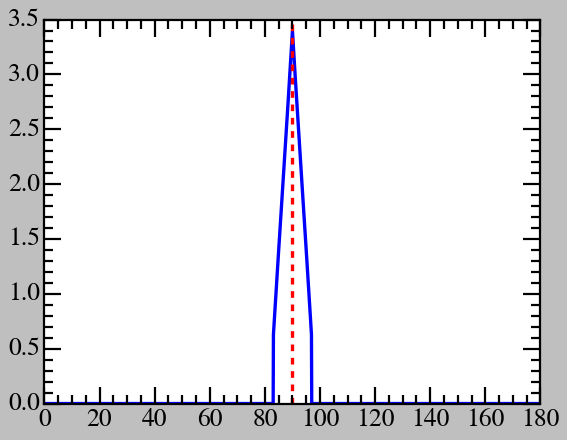

In [46]:
plt.plot(
    detector_simulation.thetas * 180/np.pi,
    trapezoid(
        detector_simulation.differential_cross_sections,
        dx = detector_simulation.phis[1] - detector_simulation.phis[0],
        axis = 1
    ) * np.sin(detector_simulation.thetas)
)

plt.axvline(
    detector_simulation.theta_de * 180/np.pi,
    color = "red",
    linestyle = "--",
)

plt.show()

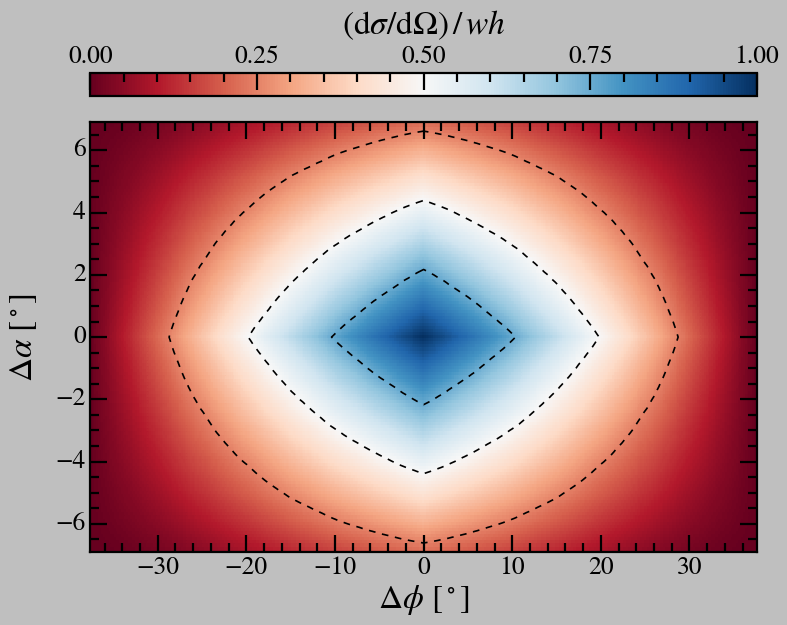

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

delta_phi_grid = (detector_simulation.phis_grid-np.pi/2) * 180/np.pi
delta_theta_grid = -(detector_simulation.thetas_grid - detector_simulation.theta_de) * 180/np.pi
differential_cross_sections = detector_simulation.differential_cross_sections

theta_ranges = (
    np.min(delta_theta_grid[differential_cross_sections > 0]),
    np.max(delta_theta_grid[differential_cross_sections > 0])
)
phi_ranges = (
    np.min(delta_phi_grid[differential_cross_sections > 0]),
    np.max(delta_phi_grid[differential_cross_sections > 0])
)

# y_mask = np.logical_and(
#     delta_theta_grid[:,1] > theta_ranges[0],
#     delta_theta_grid[:,1] < theta_ranges[1]
# )
# x_mask = np.logical_and(
#     delta_phi_grid[1,:] > phi_ranges[0],
#     delta_phi_grid[1,:] < phi_ranges[1]
# )

# delta_theta_grid = delta_theta_grid[y_mask][:,x_mask]
# delta_phi_grid = delta_phi_grid[y_mask][:,x_mask]
# differential_cross_sections = differential_cross_sections[y_mask][:,x_mask]

c = ax.pcolor(
    delta_phi_grid, delta_theta_grid,
    differential_cross_sections/base_detector_simulation.h/base_detector_simulation.w,
    cmap='RdBu', vmin=0, vmax=1,
)
cb = fig.colorbar(c, ax=ax, ticks=[0,0.25,0.5,0.75,1], location='top', aspect=30)
cb.set_label(r'$({\rm d}\sigma / {\rm d}\Omega) \, / \, w h$', labelpad=10)

con = ax.contour(
    delta_phi_grid, delta_theta_grid,
    differential_cross_sections/base_detector_simulation.h/base_detector_simulation.w,
    levels=[0.25,0.5,0.75], colors='black', linewidths=1.5, linestyles='--',
)
# plt.clabel(con, inline=True, fontsize=24)

# ax.axhline(detector_simulation.theta_de*180/np.pi, color='black', linestyle='--', dashes=(2,1.5), linewidth=2.5)

ax.set_xlim(phi_ranges)
ax.set_ylim(theta_ranges)

ax.set_xlabel(r'$\Delta\phi$ [$^\circ$]')
ax.set_ylabel(r'$\Delta\alpha$ [$^\circ$]',labelpad=15)

plt.tight_layout()
plt.savefig('cross_section_alpha_0.png')

plt.show()